In [4]:
from qsee.compilation.qsp import QuantumStatePreparation
from qsee.core import ansatz, state, gradient, optimizer
from qsee.backend import constant, utilities
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
import os
import base.gradient
import base.object
import base.hamiltonian
import numpy as np, qiskit

from matplotlib.ticker import FuncFormatter
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [9]:
thetas_opt = []
Pmaxss = []
for num_qubits in [2,3,4,5]:
    # num_qubits = 2
    thetas = np.random.uniform(0,2*np.pi,(num_qubits - 1))
    thetas = thetas.astype(np.complex128)
    Pmaxs = []
    tmaxs = []
    num_iteration = 100
    for i in range(0, num_iteration):
        h1 = base.hamiltonian.h1_xx(num_qubits, thetas)
        _, Pmax, tmax = find_Pmax(num_qubits, h1)
        Pmaxs.append(Pmax)
        tmaxs.append(tmax)
        # grad_C = -grad_Pmax
        grad_C = grad_Pmax(num_qubits, tmax, thetas, h1)
        # if i == 0:
        #     m, v1 = list(np.zeros(thetas.shape[0])), list(
        #         np.zeros(thetas.shape[0]))
        # optimizer_params = [m, v1, i, grad_C]
        # thetas = optimizer.adam(thetas, *optimizer_params)
        thetas -= 1 * grad_C
    thetas_opt.append(thetas)
    Pmaxss.append(Pmaxs)
    plt.plot(range(0, num_iteration), Pmaxs, label=f"Pmaxs at {num_qubits} qubits")
def format_func(value, tick_number):
    # transform the value to your desired format
    return f'{value / 100:.0f}'

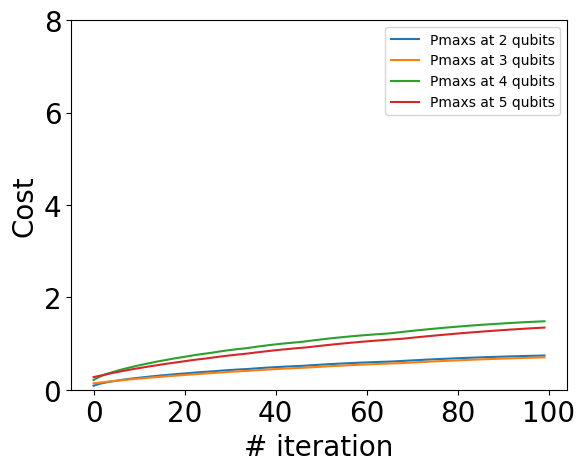

In [18]:
formatter = FuncFormatter(format_func)
for num_qubits in [2,3,4,5]:
    plt.plot(range(0, num_iteration), Pmaxss[num_qubits-2], label=f"Pmaxs at {num_qubits} qubits")
plt.gca().yaxis.set_major_formatter(formatter)
plt.xlabel("# iteration",fontsize=20)
plt.ylabel("Cost",fontsize=20)
plt.yticks(range(0,801,200),fontsize=20)
plt.xticks(fontsize=20)

plt.legend()
plt.savefig("Pmax.svg", format = 'svg')

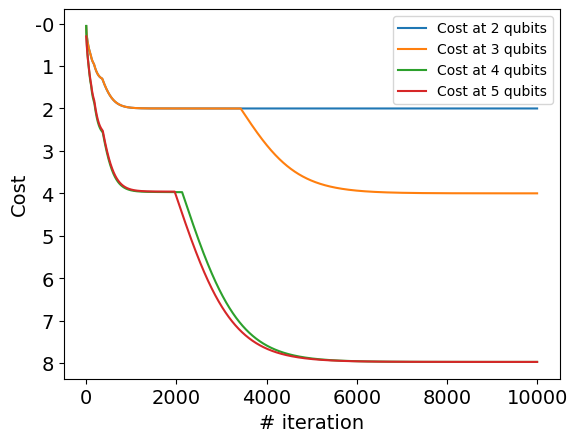

In [75]:

thetas_opt = []
for num_qubits in [2,3,4,5]:
    # num_qubits = 2
    thetas = np.random.uniform(0,2*np.pi,(num_qubits - 1))
    thetas = thetas.astype(np.complex128)
    costs = []
    tmaxs = []
    num_iteration = 10000
    for i in range(0, num_iteration):
        h1 = base.hamiltonian.h1_xx(num_qubits, thetas)
        _, Pmax, tmax = find_Pmax(num_qubits, h1)
        costs.append(-Pmax)
        tmaxs.append(tmax)
        # grad_C = -grad_Pmax
        grad_C = grad_Pmax(num_qubits, tmax, thetas, h1)
        # if i == 0:
        #     m, v1 = list(np.zeros(thetas.shape[0])), list(
        #         np.zeros(thetas.shape[0]))
        # optimizer_params = [m, v1, i, grad_C]
        # thetas = optimizer.adam(thetas, *optimizer_params)
        thetas -= 1 * grad_C
    thetas_opt.append(thetas)
    plt.plot(range(0, num_iteration), costs, label=f"Cost at {num_qubits} qubits")
def format_func(value, tick_number):
    # transform the value to your desired format
    return f'{value / -100:.0f}'

formatter = FuncFormatter(format_func)

plt.gca().yaxis.set_major_formatter(formatter)
plt.xlabel("# iteration",fontsize=14)
plt.ylabel("Cost",fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend()
plt.savefig("Cost.svg", format = 'svg')

227.61423749153332
453.91756677954874
820.4931185765657
907.6083791086336
[1.41 0.4  2.15 1.81]


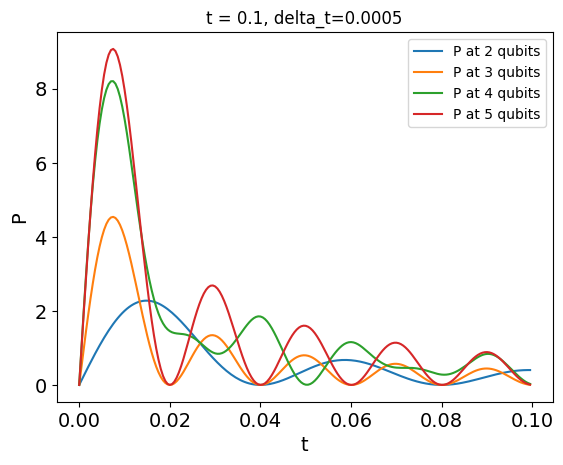

In [74]:
Es = []
for i, num_qubits in enumerate([2,3,4,5]):
    h1 = base.hamiltonian.h1_xx(num_qubits, thetas_opt[i])
    Ps, Pmax, tmax = find_Pmax(num_qubits, h1, t = 0.1, delta_t=0.0005, auto_stop=False)
    E = base.object.E(num_qubits, tmax, h1)
    print(Pmax)
    Es.append(E)
    plt.plot(np.arange(0, 0.1, 0.0005), Ps, label=f"P at {num_qubits} qubits")
plt.xticks(np.arange(0, 0.11, 0.02))
plt.title("t = 0.1, delta_t=0.0005")
plt.xlabel("t",fontsize=14)
plt.ylabel("P",fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend()
plt.gca().yaxis.set_major_formatter(formatter)
plt.savefig("P.svg", format = 'svg')
print(np.round(Es,2))   

1.9999999999999991
0.9919202532964844
3.5795525226173686
2.981234043501756


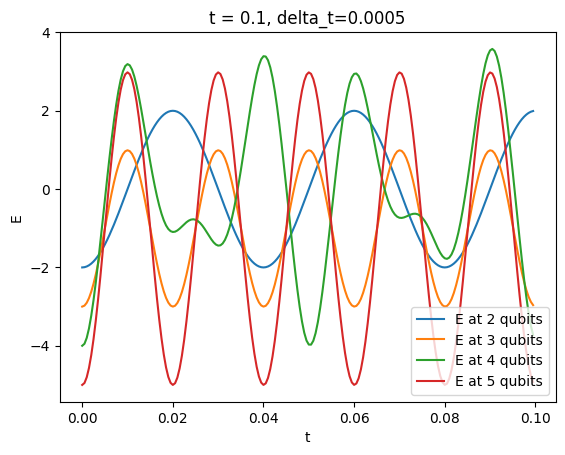

In [65]:
Ess = []
linestyles = ['-', '--', '-.', ':']
for i, num_qubits in enumerate([2,3,4,5]):
    Es = []
    h1 = base.hamiltonian.h1_xx(num_qubits, thetas_opt[i])
    for t in np.arange(0,0.1,0.0005):
        Es.append(base.object.E(num_qubits, t, h1))
    print(np.max(Es))
    Ess.append(Es)
    plt.plot(np.arange(0, 0.1, 0.0005), Es, label=f"E at {num_qubits} qubits")
plt.xticks(np.arange(0, 0.11, 0.02))
plt.title("t = 0.1, delta_t=0.0005")
plt.xlabel("t")
plt.ylabel("E")
plt.legend()
plt.savefig("E.svg", format = 'svg')